<img src="https://maestriasydiplomadostec.blob.core.windows.net/maestriasydiplomados/uploads/escuela_posgrado/logo/6/ingenieria.jpg" alt="HTML5" style="width:500px;height:100px">

# **Herramientas computacionales: el arte de la analítica**
# Evidencia: Presentación y video


*Grupo:* TC1002S.115

*Liga Canvas:* https://experiencia21.tec.mx/courses/405474/


*Alumno*
<ul>
  <li>Román Mauricio Elias Valencia - <a href="mailto:a01656603@tec.mx">a01656603@tec.mx</a></li>
  <li>María Esther Ramírez Cedillo - <a href="mailto:a01656060@tec.mx">a01656060@tec.mx</a></li>
  <li>David González Alanis - <a href="mailto:a01661650@tec.mx">a01661650@tec.mx</a></li>
  <li>Pablo Ceballos Gutiérrez - <a href="mailto:a01660148@tec.mx">a01660148@tec.mx</a></li>
</ul>

*Profesor*
<ul>
  <li>José Ángel Martínez Navarro - <a href="mailto:josekun13@tec.mx">josekun13@tec.mx</a></li>
</ul>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from tabulate import tabulate

df = pd.read_csv('/content/covid19_tweets.csv')


Analizando cada una de las variables llegamos a la siguiente conclusión

|   **Variable**   | **Tipo** |                                        **¿Que es?**                                       |
|:----------------:|:--------:|:-----------------------------------------------------------------------------------------:|
| user_name        | string   | Nombre de usuario                                                                         |
| user_location    | string   | De donde es el usuario                                                                    |
| user_description | string   | Pequeña descripcion del usuario                                                           |
| user_created     | string   | Se encuentra en formato de string pero representa fecha y hora de la creación del usuario |
| user_followers   | int      | Numero de seguidores del usuario                                                          |
| user_friends     | int      | Numero de amigos del usuario                                                              |
| user_favourites  | int      | Este dice cuantos favoritos ha tenido el tweet del que se habla                           |
| user_verified    | bool     | El usuario esta verificado (verdadero o falso)                                            |
| date             | string   | Se encuentra en formato de string pero representa fecha y hora de la creación del tweet   |
| text             | string   | Información en el tweet                                                                   |
| hashtags         | string   | Hashtags en el tweet                                                                      |
| source           | string   | Dispositivo desde donde se hizo la publicación                                            |
| is_retweet       | Bool     | Ha sido un retweet (verdadero o falso)                                                    |



In [ ]:
basic_stats = df.describe()

# Personaliza la visualización
basic_stats_styled = basic_stats.style.format("{:.2f}") \
    .set_caption("Estadísticas Básicas del Dataset") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '18px')]
    }]) \
    .set_table_attributes('style="font-size: 14px; margin-left: 0px"')

# Muestra las estadísticas básicas formateadas
display(basic_stats_styled)

,user_followers,user_friends,user_favourites
count,10955.00,10955.00,10955.00
mean,123797.23,1804.68,11777.82
std,868669.38,6912.79,35959.71
min,0.00,0.00,0.00
25%,165.00,117.00,146.00
50%,959.00,453.00,1377.00
75%,5465.00,1507.00,7657.00
max,13892841.00,256510.00,656341.00



Top 10 hashtags más utilizados:
+-----------------------+------------+
|        Hashtag        | Frecuencia |
+-----------------------+------------+
|       'COVID19'       |   26089    |
|       'Covid19'       |    3311    |
|       'covid19'       |    3069    |
|     'coronavirus'     |    2245    |
|     'Coronavirus'     |    861     |
|      'pandemic'       |    442     |
|        'India'        |    371     |
|       'corona'        |    292     |
| 'CoronavirusPandemic' |    261     |
|      'lockdown'       |    257     |
+-----------------------+------------+


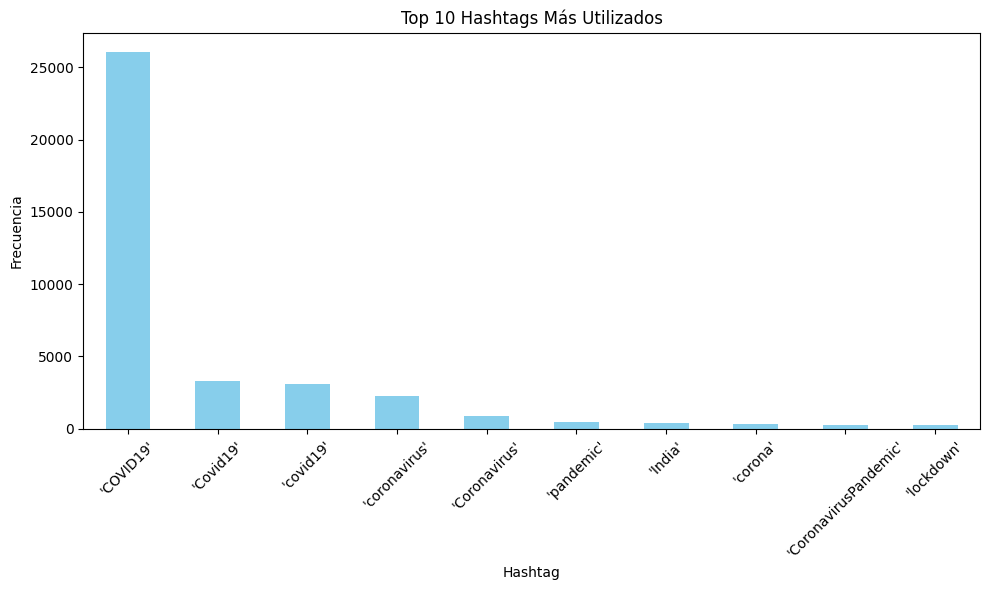

In [ ]:
hashtags = df['hashtags'].str.strip('[]').str.split(', ')

hashtags = [item for sublist in hashtags if isinstance(sublist, list) for item in sublist if pd.notna(item)]

top_hashtags = pd.Series(hashtags).value_counts().nlargest(10)

top_hashtags_df = pd.DataFrame({'Hashtag': top_hashtags.index, 'Frecuencia': top_hashtags.values})

print("\nTop 10 hashtags más utilizados:")
print(tabulate(top_hashtags_df, headers='keys', tablefmt='pretty', showindex=False))

plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='bar', color='skyblue')
plt.title('Top 10 Hashtags Más Utilizados')
plt.xlabel('Hashtag')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

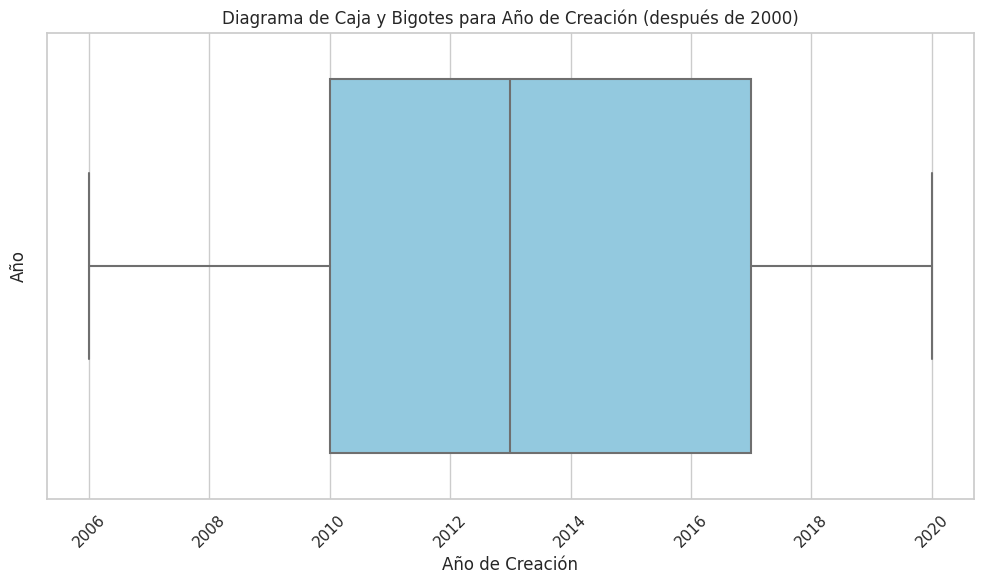

In [ ]:
df['user_created'] = pd.to_datetime(df['user_created'])

df_filtered_years = df[df['user_created'].dt.year > 2000]


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered_years['user_created'].dt.year, color='skyblue')
plt.title('Diagrama de Caja y Bigotes para Año de Creación (después de 2000)')
plt.xlabel('Año de Creación')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

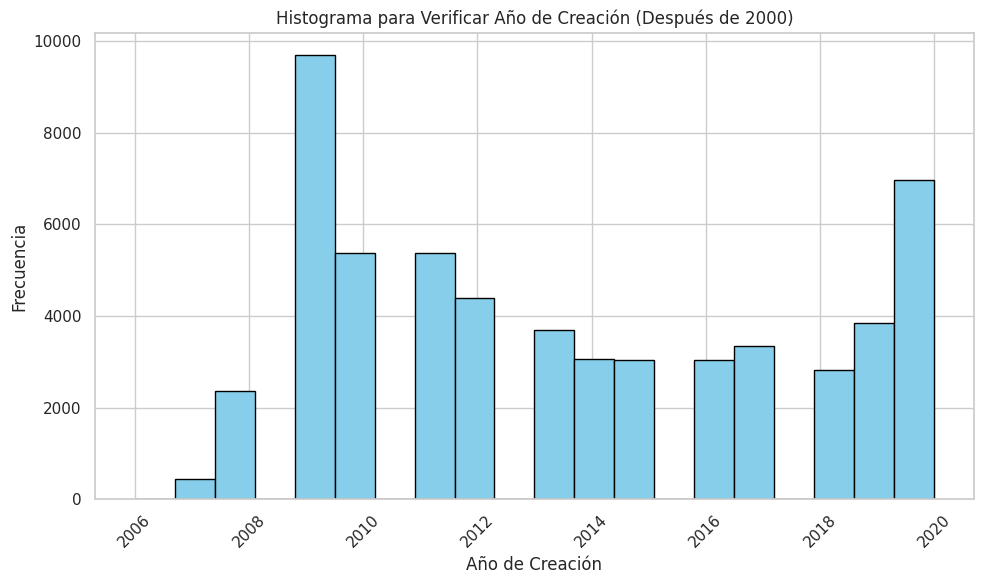

In [ ]:
df['user_created'] = pd.to_datetime(df['user_created'])

df_filtered = df[df['user_created'].dt.year > 2000]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['user_created'].dt.year, bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma para Verificar Año de Creación (Después de 2000)')
plt.xlabel('Año de Creación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

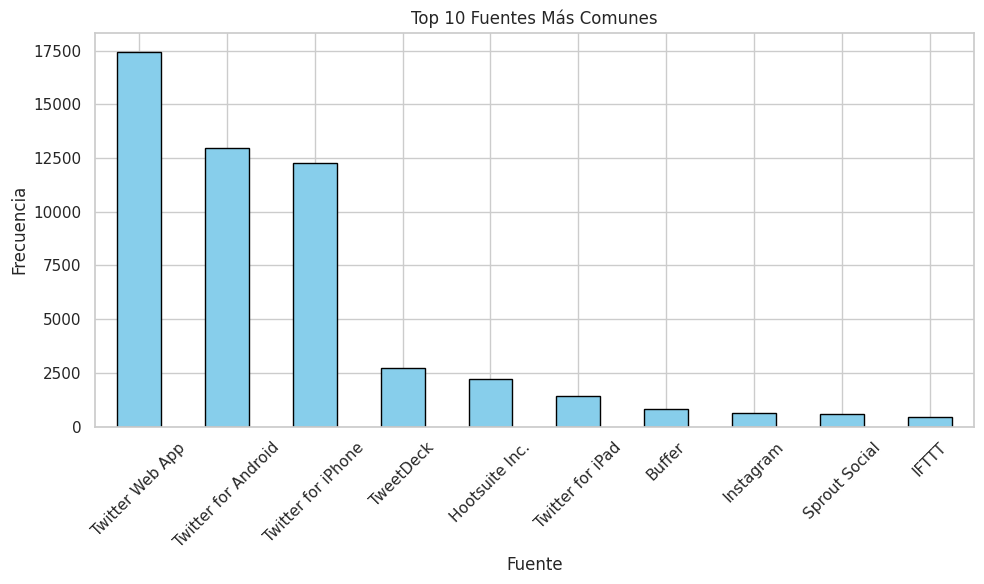

In [ ]:
top_sources = df['source'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_sources.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Fuentes Más Comunes')
plt.xlabel('Fuente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

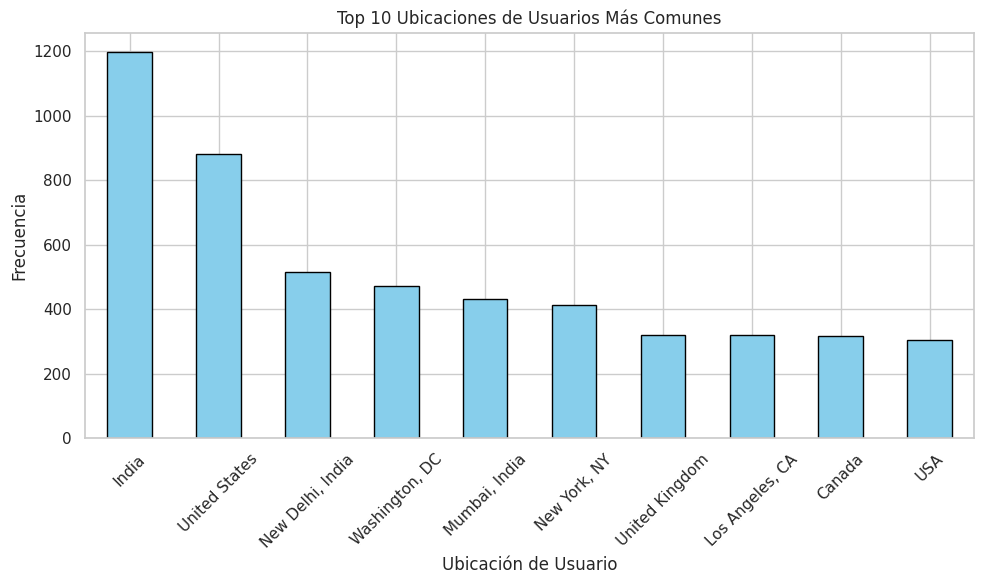

In [ ]:
top_user_locations = df['user_location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_user_locations.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Ubicaciones de Usuarios Más Comunes')
plt.xlabel('Ubicación de Usuario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

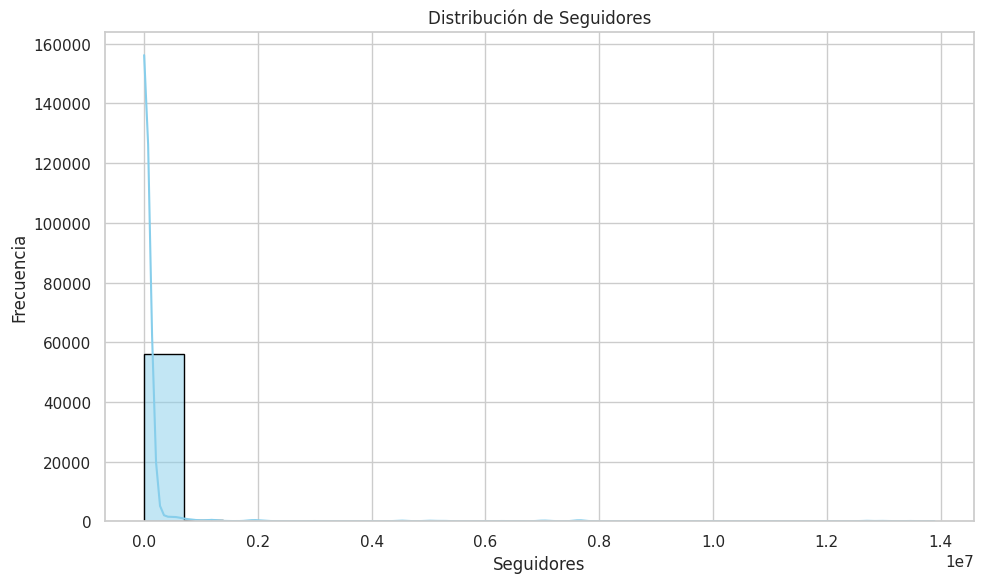

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['user_followers'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribución de Seguidores')
plt.xlabel('Seguidores')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

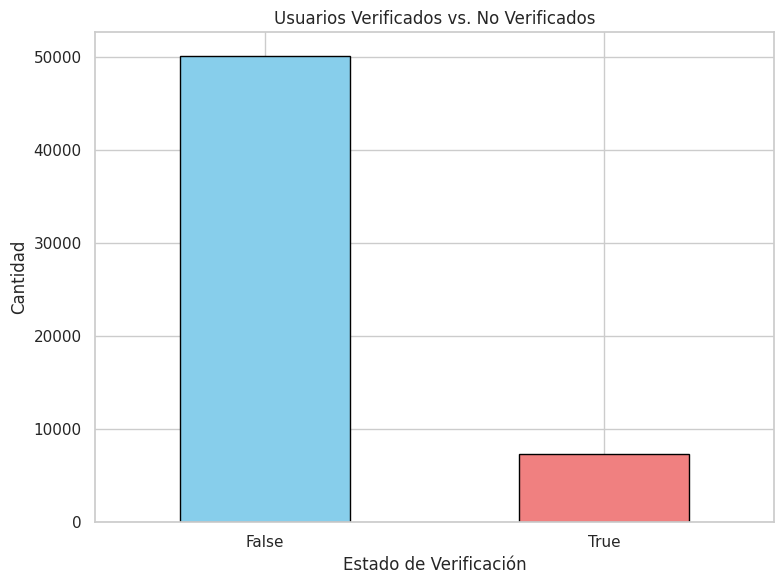

In [ ]:

user_verified_counts = df['user_verified'].value_counts()

plt.figure(figsize=(8, 6))
user_verified_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

plt.title('Usuarios Verificados vs. No Verificados')
plt.xlabel('Estado de Verificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

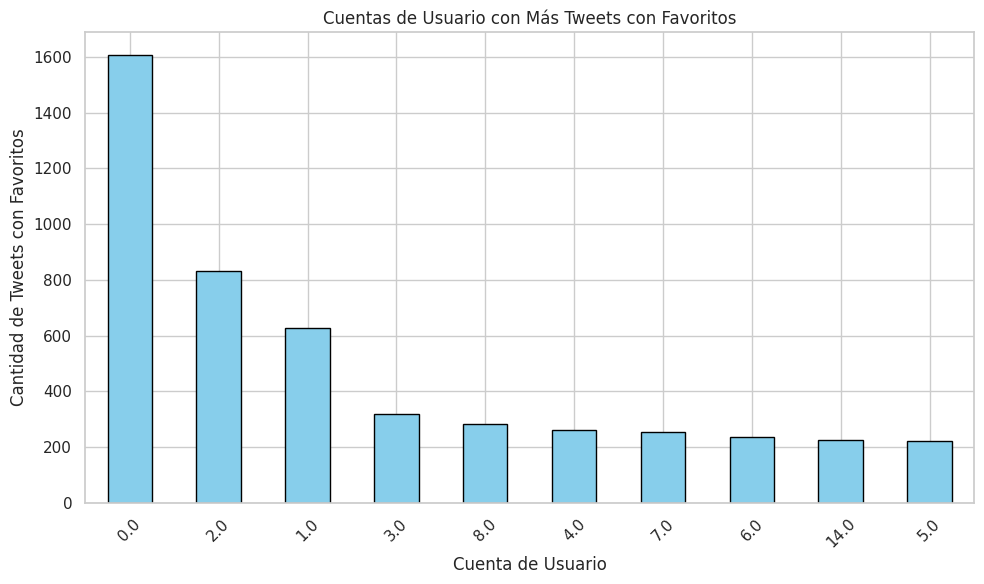

In [ ]:
top_user_favourites = df['user_favourites'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_user_favourites.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Cuentas de Usuario con Más Tweets con Favoritos')
plt.xlabel('Cuenta de Usuario')
plt.ylabel('Cantidad de Tweets con Favoritos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

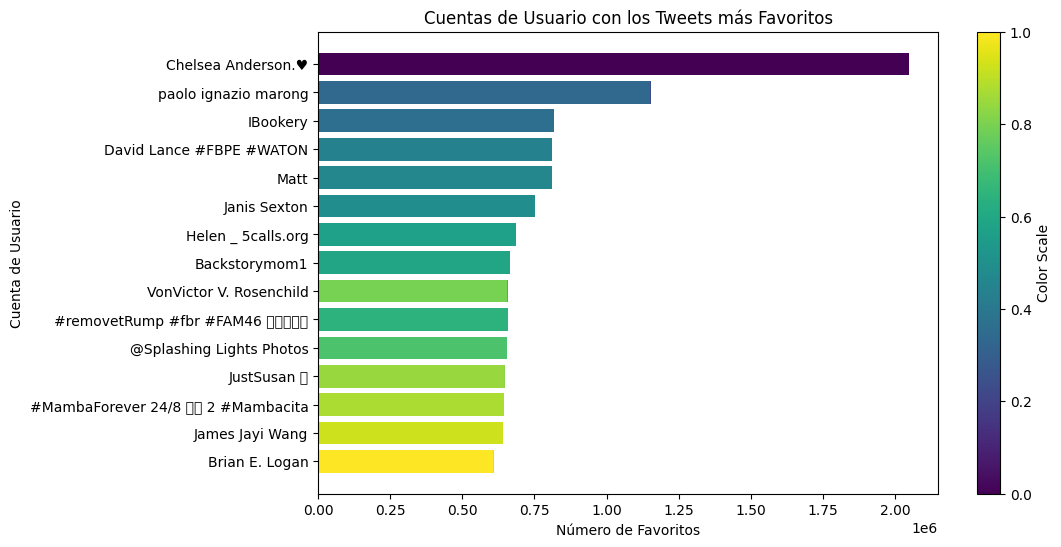

In [ ]:
df_sorted = df.sort_values(by='user_favourites', ascending=False)

top_tweets = df_sorted.head(40)


colors = plt.cm.viridis(np.linspace(0, 1, len(top_tweets)))


plt.figure(figsize=(10, 6))
bars = plt.barh(top_tweets['user_name'], top_tweets['user_favourites'], color=colors)
plt.xlabel('Número de Favoritos')
plt.ylabel('Cuenta de Usuario')
plt.title('Cuentas de Usuario con los Tweets más Favoritos')


plt.gca().invert_yaxis()


color_legend = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), orientation='vertical')
color_legend.set_label('Color Scale')


plt.show()

# **Análisis:**

**Los 10 hashtags más utilizados:**
El hashtag más frecuente fue COVID19 (incluyendo variaciones ortográficas), seguido de Coronavirus (también con variaciones ortográficas). Esto indica que la gente se refiere más a este virus como COVID19. Además, los términos relacionados con la pandemia fueron muy buscados y a menudo se combinaron con CORONAVIRUSPANDEMIA. Esto nos lleva a concluir que este fenómeno fue ampliamente buscado en las redes sociales.

**Diagrama de Caja y Bigotes para el Año de Creación (después de 2000):**
La mediana, que divide los datos en dos partes iguales, es alrededor del año 2012, lo que significa que la mitad de los usuarios crearon sus cuentas antes de 2012 y la otra mitad después. El rango intercuartil, representado por la caja, se extiende desde alrededor del año 2008 hasta el año 2016, indicando que el 50% central de los datos (es decir, la mitad de los usuarios) crearon sus cuentas durante este período. Los bigotes se extienden desde alrededor del año 2006 hasta el año 2020, representando el rango total de los datos, excluyendo posibles valores atípicos. La simetría del gráfico sugiere una distribución aproximadamente igual a ambos lados de la mediana.

**Histograma para Verificar el Año de Creación (después de 2000):**
Ambos gráficos proporcionan información coherente sobre los mismos datos. La mediana del diagrama de caja y bigotes es alrededor del año 2012, que parece ser un punto de inflexión en el histograma donde la frecuencia comienza a disminuir. El rango intercuartil del diagrama de caja y bigotes coincide con el rango en el histograma donde la mayoría de las barras están concentradas. Los bigotes del diagrama de caja y bigotes se extienden desde alrededor del año 2006 hasta el año 2020, que son los límites del histograma. El histograma muestra que la frecuencia más alta es en el año 2008, seguida por el año 2020.

**Las 10 fuentes más comunes:**
Este gráfico muestra que la mayoría de las publicaciones se realizaron en Twitter a través de la aplicación web. Esto sugiere que debido al confinamiento, los usuarios utilizaron más sus computadoras que sus dispositivos móviles, ya que Twitter para Android ocupa el segundo lugar y Twitter para iPhone el tercer lugar.

**Las 10 ubicaciones de usuarios más comunes:**
Este gráfico muestra que la mayoría de las publicaciones provenían de India. Esto concuerda con los hashtags más utilizados, ya que India aparece entre ellos. Además, tres ciudades de India aparecen en el top 10 de ubicaciones. En segundo lugar están los Estados Unidos con cuatro ciudades en el top 10.

**Distribución de seguidores:**
Este gráfico muestra que la mayoría de los usuarios tienen un número bajo de seguidores, mientras que un número menor tiene un número mayor. Esto es común en muchas redes sociales.

**Usuarios verificados vs no verificados:**
Este gráfico muestra que hubo una cantidad mucho mayor de usuarios no verificados haciendo publicaciones.

**Usuarios con más tweets favoritos:**
Este gráfico muestra una variación significativa en la cantidad de tweets favoritos entre diferentes cuentas de usuario. Algunos usuarios tienen un gran número de tweets favoritos, mientras que otros tienen menos. Esto podría estar influenciado por varios factores, como el número total de tweets publicados por un usuario, la cantidad de seguidores que tienen, o el tipo de contenido que publican.

**Usuarios con los tweets más favoritos:**
Este gráfico muestra una variación considerable en la cantidad de favoritos que reciben los tweets de diferentes usuarios. Algunos usuarios, como Chelsea Anderson, tienen un alto número de favoritos en sus tweets, lo que podría sugerir que sus tweets son especialmente populares o impactantes. Por otro lado, otros usuarios, como Brian S. Logan, tienen un número relativamente bajo de favoritos en sus tweets.

En resumen, estos gráficos nos proporcionan una visión interesante sobre cómo los tweets y los usuarios son valorados en la plataforma. Muestran que hay una amplia gama de experiencias y niveles de compromiso en la plataforma, y que factores como la cantidad de seguidores y el tipo de contenido pueden tener un impacto significativo en la cantidad de favoritos que recibe un tweet.